Dataset preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1

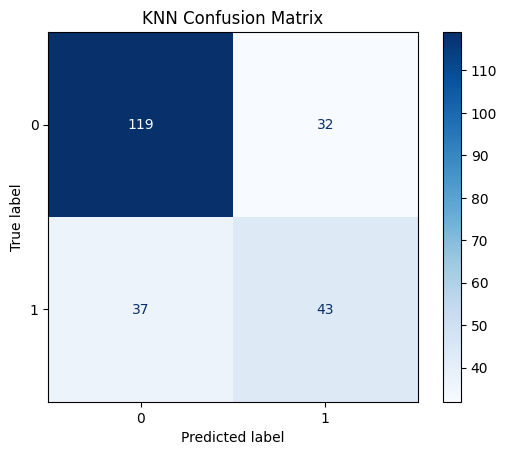


--- Naive Bayes Results ---
Accuracy: 74.46%
F1 Score: 0.6424
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



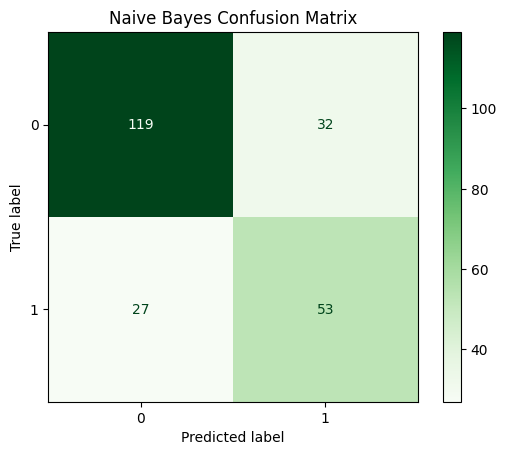


=== Model Comparison ===
KNN     -> Accuracy: 70.13%, F1: 0.5548
NaiveBayes -> Accuracy: 74.46%, F1: 0.6424


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv("pima-indians-diabetes.data.csv", names=column_names)

print("Dataset preview:")
print(df.head())
print("\nDataset info:")
print(df.info())

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\n--- KNN Results ---")
print(f"Accuracy: {acc_knn * 100:.2f}%")
print(f"F1 Score: {f1_knn:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot(cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("\n--- Naive Bayes Results ---")
print(f"Accuracy: {acc_nb * 100:.2f}%")
print(f"F1 Score: {f1_nb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb)).plot(cmap='Greens')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print("\n=== Model Comparison ===")
print(f"KNN     -> Accuracy: {acc_knn * 100:.2f}%, F1: {f1_knn:.4f}")
print(f"NaiveBayes -> Accuracy: {acc_nb * 100:.2f}%, F1: {f1_nb:.4f}")
